# Clustering neighborhoods of Paris from an artistic offer point of view


In [1]:
import pandas as pd

In [35]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium 

!pip install -U folium 

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Requirement already up-to-date: folium in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.11.0)
Libraries imported.


In [148]:
#import categories of art venues to be used for the search in Foursquare
categ = pd.read_csv('categ.csv', encoding= 'unicode_escape', sep=';')
categ

,category,id
0,Art Gallery,4bf58dd8d48988d1e2931735
1,Comedy Club,4bf58dd8d48988d18e941735
2,Concert Hall,5032792091d4c4b30a586d5c
3,Exhibit,56aa371be4b08b9a8d573532
4,General Entertainment,4bf58dd8d48988d1f1931735
5,Historic Site,4deefb944765f83613cdba6e
6,Movie Theater,4bf58dd8d48988d17f941735
7,Museum,4bf58dd8d48988d181941735
8,Music Venue,4bf58dd8d48988d1e5931735
9,Dance Studio,4bf58dd8d48988d134941735


In [10]:
#Foursquare use
CLIENT_ID = 'JCZENS3XSAFMWHEJDGYEFPC4DP5MQSFDLO01ASRTPKZUZRLH' # your Foursquare ID
CLIENT_SECRET = '0YKYWSYK1G2AFTAVEJRP3DAWKZQMM5UXPCDGP1Q0WQBDSE0Z' # your Foursquare Secret
VERSION = '20200922' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JCZENS3XSAFMWHEJDGYEFPC4DP5MQSFDLO01ASRTPKZUZRLH
CLIENT_SECRET:0YKYWSYK1G2AFTAVEJRP3DAWKZQMM5UXPCDGP1Q0WQBDSE0Z


In [70]:
#json import json file of Paris neighborhoods 
neigh_paris = [ {"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.3201751708984375,48.8641501307046],[2.3242950439453125,48.869570326277575],[2.3280715942382812,48.87013489622034],[2.3299598693847656,48.86810241461343],[2.3514175415039062,48.863472564977805],[2.3455810546875,48.853646831055556],[2.334423065185547,48.85963285258176]]]},"properties":{"name":"75001"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.3282432556152344,48.87013489622034],[2.3397445678710938,48.87205438637627],[2.3545074462890625,48.869231581254176],[2.3514175415039062,48.86335963646481],[2.3297882080078125,48.86821533242417]]]},"properties":{"name":"75002"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.3546791076660156,48.869231581254176],[2.363433837890625,48.86787657822752],[2.3672103881835938,48.86234326838097],[2.367725372314453,48.85579284560999],[2.3586273193359375,48.8583905296204],[2.3505592346191406,48.861552745601394]]]},"properties":{"name":"75003"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.3675537109375,48.85579284560999],[2.3685836791992188,48.85342092943525],[2.367382049560547,48.84585263610676],[2.364635467529297,48.84449700009082],[2.356739044189453,48.84958044593268],[2.3452377319335938,48.853533880372815],[2.3502159118652344,48.861665678191514],[2.358541488647461,48.85816464940566]]]},"properties":{"name":"75004"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.36480712890625,48.84393214092012],[2.3612022399902344,48.83941303819501],[2.350902557373047,48.836814369491535],[2.3364830017089844,48.839526020732606],[2.344379425048828,48.85330797824286],[2.3565673828125,48.849354525964365]]]},"properties":{"name":"75005"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.335968017578125,48.840090929598006],[2.3163986206054688,48.84709527021744],[2.3272132873535156,48.85127481320342],[2.3328781127929688,48.85997166258356],[2.3450660705566406,48.853533880372815]]]},"properties":{"name":"75006"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.3201751708984375,48.86403720372053],[2.3009490966796875,48.863246707697],[2.2927093505859375,48.859858726171105],[2.2909069061279297,48.8573740606269],[2.3076438903808594,48.84686933903632],[2.3111629486083984,48.84771657570947],[2.3137378692626953,48.845965604118284],[2.326955795288086,48.85121833521814],[2.3329639434814453,48.85997166258356]]]},"properties":{"name":"75007"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.3018932342529297,48.86398074013291],[2.299833297729492,48.86527938653052],[2.294769287109375,48.87403025520477],[2.2978591918945312,48.87792531090653],[2.327299118041992,48.883456897746534],[2.3268699645996094,48.87363508768185],[2.3244667053222656,48.86973969792929],[2.3201751708984375,48.8641501307046]]]},"properties":{"name":"75008"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.3276424407958984,48.883456897746534],[2.3294448852539062,48.88447283699084],[2.3398303985595703,48.88182006333119],[2.3496150970458984,48.88385198768281],[2.3482418060302734,48.87064300372225],[2.339315414428711,48.87222374961926],[2.324380874633789,48.869570326277575],[2.3272132873535156,48.87363508768185]]]},"properties":{"name":"75009"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.3496150970458984,48.88390842884749],[2.3682403564453125,48.88424707449789],[2.370128631591797,48.88249738062104],[2.3703861236572266,48.877699518857085],[2.376737594604492,48.87211084085429],[2.3633480072021484,48.867763659652354],[2.3485851287841797,48.870699459792846]]]},"properties":{"name":"75010"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.376565933227539,48.8719414772291],[2.387208938598633,48.86285145500294],[2.3895263671875,48.85816464940564],[2.3946762084960938,48.8565834593617],[2.3993968963623047,48.848846202308756],[2.3988819122314453,48.848168429407245],[2.3690128326416016,48.853082075093546],[2.3675537109375,48.855905791196136],[2.366952896118164,48.862399733816005],[2.3636913299560547,48.867763659652354]]]},"properties":{"name":"75011"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.3988819122314453,48.848111947917985],[2.4147605895996094,48.84664340683584],[2.4104690551757812,48.83415906874613],[2.4158763885498047,48.8338200840525],[2.4224853515625,48.83579746243093],[2.418966293334961,48.842068060454025],[2.4198246002197266,48.84359322235957],[2.4237728118896484,48.8427459159238],[2.4248886108398438,48.841955083650454],[2.433042526245117,48.84088179130599],[2.4345016479492188,48.844948882840264],[2.4392223358154297,48.84460997116043],[2.439565658569336,48.84709527021744],[2.4647140502929688,48.8434237622192],[2.471494674682617,48.83534549711116],[2.4700355529785156,48.83127762573854],[2.464456558227539,48.82737893906816],[2.4657440185546875,48.8261358157711],[2.4639415740966797,48.81952414194507],[2.457590103149414,48.81737657305471],[2.4388790130615234,48.81924157234783],[2.4334716796875,48.820993478172554],[2.4290084838867188,48.82370598573833],[2.4199962615966797,48.824214564563555],[2.411327362060547,48.82494916931076],[2.401885986328125,48.829582581850715],[2.3893117904663086,48.826757381274426],[2.3651719093322754,48.844327543008596],[2.367349863052368,48.845824394064046],[2.368782162666321,48.85284205188055]]]},"properties":{"name":"75012"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.3888397216796875,48.826474852455924],[2.3624038696289062,48.81568105893788],[2.355794906616211,48.81607668402782],[2.352447509765625,48.818224308608066],[2.3486709594726562,48.81737657305471],[2.346525192260742,48.81602016634899],[2.3439502716064453,48.816302754105976],[2.344636917114258,48.81958065567337],[2.3418045043945312,48.82268881260476],[2.341461181640625,48.82636184048252],[2.3454952239990234,48.83794424201479],[2.3509883880615234,48.836814369491535],[2.3612022399902344,48.839356546830615],[2.3648929595947266,48.84387565465262]]]},"properties":{"name":"75013"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.343778610229492,48.816189719194334],[2.33184814453125,48.81698095822345],[2.3321914672851562,48.81856339881515],[2.301206588745117,48.82528821402381],[2.3233509063720703,48.844384028766356],[2.3360538482666016,48.83958251190587],[2.3450660705566406,48.837774762760944],[2.340817451477051,48.826531358347054],[2.341783046722412,48.822660557500804],[2.344411611557007,48.819764324850304]]]},"properties":{"name":"75014"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.301206588745117,48.82534472125296],[2.2917652130126953,48.82715291894426],[2.280263900756836,48.83212512617883],[2.273740768432617,48.827774471831894],[2.267475128173828,48.82794398491776],[2.2670459747314453,48.83184262762493],[2.2690200805664062,48.832746617390605],[2.266101837158203,48.83466754148594],[2.276487350463867,48.846304506623845],[2.2891902923583984,48.8547763238673],[2.2905635833740234,48.8572611183535],[2.3076438903808594,48.84686933903632],[2.311077117919922,48.847660093710566],[2.3136520385742188,48.845965604118284],[2.3164844512939453,48.84686933903632],[2.3235225677490234,48.84432754300857]]]},"properties":{"name":"75015"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.2658443450927734,48.83461104476972],[2.2600936889648438,48.83472403813848],[2.2546863555908203,48.836757875196426],[2.2510814666748047,48.8398649668164],[2.2518539428710938,48.84449700009082],[2.2518539428710938,48.84551373054311],[2.2418975830078125,48.84794250306802],[2.2397518157958984,48.84958044593268],[2.226104736328125,48.85291264706266],[2.2254180908203125,48.85573637272137],[2.230653762817383,48.86691676221638],[2.2364044189453125,48.87053009138998],[2.246274948120117,48.87561089408286],[2.2552871704101562,48.874143159638024],[2.258634567260742,48.880408956183125],[2.2811222076416016,48.877643070685465],[2.294597625732422,48.87403025520477],[2.2997474670410156,48.86499707496295],[2.3016357421875,48.863867812766614],[2.2913360595703125,48.860197534643966],[2.287752628326416,48.85569401801307],[2.2759294509887695,48.846558681997884]]]},"properties":{"name":"75016"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.2815513610839844,48.87809465427476],[2.2817230224609375,48.88176361980966],[2.2919046878814697,48.88831064343852],[2.3068928718566895,48.89553395068032],[2.3210763931274414,48.90049936905012],[2.329530715942383,48.90061221373512],[2.3254966735839844,48.8874640938066],[2.327299118041992,48.88368266380661],[2.298116683959961,48.87798175875963],[2.2946834564208984,48.87419961175908]]]},"properties":{"name":"75017"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.329530715942383,48.90061221373512],[2.3699569702148438,48.9007250581654],[2.3708152770996094,48.896549644565184],[2.372102737426758,48.89542109453028],[2.3700428009033203,48.894066800857466],[2.365407943725586,48.88447283699084],[2.3493576049804688,48.88390842884749],[2.339658737182617,48.881989393513585],[2.3291873931884766,48.88458571785511],[2.3273849487304688,48.88362622238713],[2.325582504272461,48.88740765665489]]]},"properties":{"name":"75018"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.3700428009033203,48.90055579142446],[2.3888397216796875,48.90044294661203],[2.3921871185302734,48.89970944912112],[2.3943328857421875,48.898016721521145],[2.397937774658203,48.88447283699084],[2.4021434783935547,48.88153784508654],[2.407379150390625,48.87973161061082],[2.4098682403564453,48.87758662245016],[2.400083541870117,48.87515928807093],[2.389698028564453,48.87555444355432],[2.3768234252929688,48.87199793183453],[2.3706436157226562,48.87753017415113],[2.370471954345703,48.88266670851025],[2.368326187133789,48.88452927745483],[2.365751266479492,48.88469859846461],[2.3702144622802734,48.89415144528688],[2.372102737426758,48.8954916296539],[2.370901107788086,48.89666955150907]]]},"properties":{"name":"75019"}},{"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[2.4097824096679688,48.87747372578843],[2.414073944091797,48.870868827622395],[2.413473129272461,48.85347740493588],[2.4153614044189453,48.85054059442589],[2.4147605895996094,48.84681285608177],[2.3992252349853516,48.848281392194565],[2.3996543884277344,48.84873324079559],[2.3947620391845703,48.85680934671159],[2.389354705810547,48.85805170891599],[2.386951446533203,48.86319024321753],[2.3770809173583984,48.87205438637627],[2.3897838592529297,48.87544154230615],[2.399911880493164,48.875046385930936]]]},"properties":{"name":"75020"}}, 
]

In [21]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neigh_paris[0]['geometry']['coordinates'][0][1]

[2.3242950439453125, 48.869570326277575]

In [22]:
#get addresses of mayors and define them as the centers of neighborhoods
geolocator = Nominatim(user_agent="foursquare_agent")
mairie = pd.read_csv('mairie.csv', encoding= 'unicode_escape', sep=';')

48.8650884

In [284]:
for i in mairie.index : 
    add = mairie.at[i, 'address']
    location = geolocator.geocode(add)
    neighborhoods.at[i, 'Latitude'] = location.latitude
    neighborhoods.at[i, 'Longitude'] = location.longitude
    print(i, location.latitude, location.longitude )
neighborhoods

0 48.8600742 2.3410925
1 48.86672945 2.3404699027144957
2 48.8639974 2.3617555
3 48.8560527 2.356322
4 48.8461638 2.3444707
5 48.850714 2.3326577
6 48.8568598 2.3200325
7 48.87736405 2.317352021974367
8 48.8725984 2.3404534
9 48.8717915 2.357372
10 48.8576226 2.3802745
11 48.8411136 2.3883379
12 48.8323138 2.355485
13 48.8328659 2.326793783988636
14 48.8430609 2.2987187
15 48.8638636 2.2765891
16 48.8843307 2.3221064
17 48.8926182 2.3451118
18 48.8825858 2.3821563597427593
19 48.8650884 2.3989861


,Neighborhood,Latitude,Longitude
0,75001,48.860074,2.341092
1,75002,48.866729,2.340470
2,75003,48.863997,2.361756
3,75004,48.856053,2.356322
4,75005,48.846164,2.344471
5,75006,48.850714,2.332658
6,75007,48.856860,2.320032
7,75008,48.877364,2.317352
8,75009,48.872598,2.340453
9,75010,48.871792,2.357372


In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius, limit):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
#test and search for theatres in Paris
address= 'Paris'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

#museums search_query = '4bf58dd8d48988d181941735'
#opera search_query = '4bf58dd8d48988d136941735'
#theatres 
search_query = '4bf58dd8d48988d137941735'
radius = 5000
limit = 100
print(search_query + ' .... OK!')

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, limit)

results = requests.get(url).json()
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues, errors= 'ignore')

In [31]:
#search for venues of different category types in each neighborhood
radius = 5000
limit = 50
#dataframe1 = dataframe
dataframe1 = pd.DataFrame(columns=list(dataframe.columns)) 

for i in neighborhoods.index : 
        latitudes = neighborhoods.at[i, 'Latitude']
        longitudes = neighborhoods.at[i, 'Longitude']
        
        for c in categ.id :
            url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitudes, longitudes, VERSION, c, radius, limit)
            print(i, latitudes, longitudes, dataframe1.shape, c)
        
            results = requests.get(url).json()

            venues = results['response']['venues']

        # tranform venues into a dataframe
            a = pd.json_normalize(venues, errors= 'ignore')
            dataframe1 = dataframe1.append(a)
       

1 48.87205438637627 2.3397445678710938 (673, 19) 4bf58dd8d48988d1e2931735
1 48.87205438637627 2.3397445678710938 (722, 19) 4bf58dd8d48988d18e941735
1 48.87205438637627 2.3397445678710938 (772, 19) 5032792091d4c4b30a586d5c
1 48.87205438637627 2.3397445678710938 (821, 19) 56aa371be4b08b9a8d573532
1 48.87205438637627 2.3397445678710938 (862, 19) 4bf58dd8d48988d1f1931735
1 48.87205438637627 2.3397445678710938 (907, 19) 4deefb944765f83613cdba6e
1 48.87205438637627 2.3397445678710938 (956, 19) 4bf58dd8d48988d17f941735
1 48.87205438637627 2.3397445678710938 (1006, 19) 4bf58dd8d48988d181941735
1 48.87205438637627 2.3397445678710938 (1056, 19) 4bf58dd8d48988d1e5931735
1 48.87205438637627 2.3397445678710938 (1105, 19) 4bf58dd8d48988d134941735
1 48.87205438637627 2.3397445678710938 (1145, 19) 4bf58dd8d48988d135941735
1 48.87205438637627 2.3397445678710938 (1158, 19) 4bf58dd8d48988d136941735
1 48.87205438637627 2.3397445678710938 (1162, 19) 4bf58dd8d48988d137941735
1 48.87205438637627 2.3397445678

In [177]:
#export data of Paris venues
#dataframe_paris.to_csv("data_paris.csv")

In [32]:
# keep only columns that include venue name, and anything that is associated with location
dataframe=dataframe1
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered = dataframe_filtered.drop_duplicates('id')

In [3]:
#after writing data of Paris art venues in a file, read the file
paris=pd.read_csv('data_paris.csv')

In [4]:
#look at the categories of art venues resulting from the search
categories=paris['categories']
categories.unique()

array(['Art Gallery', 'Historic Site', 'Cultural Center', 'Bar',
       'Coffee Shop', 'Performing Arts Venue', 'Bookstore', 'Music Venue',
       'Concert Hall', 'Comedy Club', 'Theater', 'Indie Movie Theater',
       'Restaurant', 'Temple', 'Coworking Space', 'Nightclub', 'Church',
       'Exhibit', 'General Entertainment', 'Library', 'Boat or Ferry',
       'Museum', 'Miscellaneous Shop', 'Garden', 'Cemetery', 'Building',
       'Government Building', 'Courthouse', 'Scenic Lookout', 'Park',
       'Plaza', 'Monument / Landmark', 'Movie Theater', 'Multiplex',
       'Drive-in Theater', 'Art Museum', 'History Museum',
       'Science Museum', 'Cocktail Bar', 'Jazz Club', 'Rock Club',
       'Radio Station', 'Event Space', 'Beer Garden', 'French Restaurant',
       'Irish Pub', 'Pub', 'Dance Studio', 'Gym / Fitness Center',
       'Pilates Studio', 'Indie Theater', 'Opera House',
       'College Theater', 'Outdoor Sculpture', 'Public Art', 'Street Art',
       'Tapas Restaurant', 'Spor

In [5]:
categ = pd.DataFrame(categories.unique())

In [6]:
#select categories that make the most sense
categ_unique = ['Art Gallery', 'Music Venue', 'Concert Hall', 'Comedy Club', 'Theater', 'Exhibit',
        'Art Museum', 'Jazz Club',  'Dance Studio', 'Opera House',
        'Outdoor Sculpture', 'Public Art', 'Street Art']
#count categories
len(categ_unique)

13

In [7]:
paris_filtered = paris[paris['categories'].isin(categ_unique)]

In [8]:
#count the number of category types 
paris_filtered['categories'].value_counts()

Theater              123
Comedy Club          117
Concert Hall         109
Art Gallery          107
Dance Studio          97
Street Art            85
Music Venue           69
Art Museum            59
Public Art            54
Exhibit               51
Outdoor Sculpture     48
Jazz Club             19
Opera House            6
Name: categories, dtype: int64

In [9]:
#transform into a dataframe of dummies
paris_dummies = pd.get_dummies(paris_filtered[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_dummies['postalcode'] = paris_filtered['postalCode'] 
paris_dummies['name'] = paris_filtered['name'] 


# move neighborhood column to the first column
fixed_columns = [paris_dummies.columns[-1]] + list(paris_dummies.columns[:-1])
paris_dummies = paris_dummies[fixed_columns]

In [10]:
#list of venues that do not have the neighborhood info
paris_dummies
paris_dummies[paris_dummies['postalcode'].isna() == True]

,name,Art Gallery,Art Museum,Comedy Club,Concert Hall,Dance Studio,Exhibit,Jazz Club,Music Venue,Opera House,Outdoor Sculpture,Public Art,Street Art,Theater,postalcode
6,Instituto Cultural De México,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
7,Little Big Galerie,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
12,La Ville a des Arts,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
51,Theatre Guignol Anatole,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN
54,Comédie des Champs Elysées,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,#Achat D'art de Leo burnett,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1438,Le Bouquet,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN
1456,Le Terrain,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN
1458,Space Invader,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN


In [11]:
#group venues for each neighborhood of Paris and count their number
paris_grouped = paris_dummies.groupby('postalcode').sum().reset_index()
#jazz club is a music venue
paris_grouped['Music Venue'] = paris_grouped['Music Venue'] + paris_grouped['Jazz Club']

In [12]:
#define neighborhoods of Paris
code_paris = ['75001', '75002', '75003', '75004', '75005', '75006', '75007', '75008', '75009', '75010', '75011', '75012', '75013', '75014', '75015', '75016', '75017', '75018', '75019', '75020']

In [13]:
#keep only venues in one of the Paris neighboorhoods
paris_final = paris_grouped[paris_grouped['postalcode'].isin(list(code_paris))]

In [16]:
paris_final.drop(columns = 'Jazz Club' )

,postalcode,Art Gallery,Art Museum,Comedy Club,Concert Hall,Dance Studio,Exhibit,Music Venue,Opera House,Outdoor Sculpture,Public Art,Street Art,Theater
1,75001,4,7,2,1,1,11,3,0,4,0,3,4
2,75002,1,0,2,1,1,0,0,0,1,0,4,3
3,75003,14,3,2,1,0,0,0,0,0,2,4,2
4,75004,8,3,1,2,0,2,1,0,0,2,1,4
5,75005,0,1,3,0,0,1,4,0,1,0,3,2
6,75006,8,2,2,4,1,2,3,0,2,1,1,4
7,75007,9,7,0,2,2,4,2,0,1,1,1,1
8,75008,7,3,1,5,2,1,0,0,4,0,0,5
9,75009,2,1,4,1,5,2,0,1,0,0,2,7
10,75010,3,1,2,3,4,3,3,0,1,1,5,8


In [18]:
#clustering

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# set number of clusters
kclusters = 6

paris_clustering = paris_final.drop('postalcode', 1)

#transform data using a minmaxscaler in order for each variable to be of equal importancce
mms = MinMaxScaler()
mms.fit(paris_clustering)
paris_clustering = mms.transform(paris_clustering)


# run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=kclusters, random_state=0, algorithm = 'auto').fit(paris_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([3, 1, 5, 5, 1, 1, 5, 1, 4, 0, 0, 4, 0, 2, 1, 1, 1, 2, 1, 0],
      dtype=int32)

In [19]:
# add clustering labels
paris_final.insert(0, 'Cluster Labels', kmeans.labels_)

In [21]:
#after writing results in a file, read the file
merged=pd.read_csv('clustering_paris_6_minmax.csv')
#merge the dataset of number of venues with gps data of each neighborhood
#merged = neighborhoods.merge(paris_final, left_on='Neighborhood', right_on='postalcode'
merged = merged.drop(columns=['Unnamed: 0', 'postalcode', 'Jazz Club'], axis = 1)
merged

,Neighborhood,Latitude,Longitude,Cluster Labels,Art Gallery,Art Museum,Comedy Club,Concert Hall,Dance Studio,Exhibit,Music Venue,Opera House,Outdoor Sculpture,Public Art,Street Art,Theater
0,75001,48.860074,2.341092,3,4,7,2,1,1,11,3,0,4,0,3,4
1,75002,48.866729,2.340470,1,1,0,2,1,1,0,0,0,1,0,4,3
2,75003,48.863997,2.361756,5,14,3,2,1,0,0,0,0,0,2,4,2
3,75004,48.856053,2.356322,5,8,3,1,2,0,2,1,0,0,2,1,4
4,75005,48.846164,2.344471,1,0,1,3,0,0,1,4,0,1,0,3,2
5,75006,48.850714,2.332658,1,8,2,2,4,1,2,3,0,2,1,1,4
6,75007,48.856860,2.320032,5,9,7,0,2,2,4,2,0,1,1,1,1
7,75008,48.877364,2.317352,1,7,3,1,5,2,1,0,0,4,0,0,5
8,75009,48.872598,2.340453,4,2,1,4,1,5,2,0,1,0,0,2,7
9,75010,48.871792,2.357372,0,3,1,2,3,4,3,3,0,1,1,5,8


In [24]:
a = merged.groupby('Cluster Labels').mean()
a= a.drop(columns = {'Neighborhood', 'Latitude', 'Longitude'})
a

,Art Gallery,Art Museum,Comedy Club,Concert Hall,Dance Studio,Exhibit,Music Venue,Opera House,Outdoor Sculpture,Public Art,Street Art,Theater
Cluster Labels,,,,,,,,,,,,
0,2.250000,1.000000,2.0,4.750000,3.500000,1.25,3.25,0.0,0.500000,1.250000,3.500,5.500000
1,2.500000,1.375000,2.0,2.875000,1.375000,1.25,2.25,0.0,1.750000,0.250000,1.125,2.625000
2,3.000000,1.500000,3.5,1.000000,4.000000,0.00,3.50,0.0,3.500000,1.000000,3.000,9.000000
3,4.000000,7.000000,2.0,1.000000,1.000000,11.00,3.00,0.0,4.000000,0.000000,3.000,4.000000
4,1.500000,0.500000,2.5,1.000000,4.500000,1.50,0.50,1.0,0.000000,0.000000,1.000,6.000000
5,10.333333,4.333333,1.0,1.666667,0.666667,2.00,1.00,0.0,0.333333,1.666667,2.000,2.333333


In [324]:
#find number of clusters to use
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(init='k-means++', n_clusters=k, random_state=1, algorithm = 'auto')
    km = km.fit(paris_clustering)
    Sum_of_squared_distances.append(km.inertia_)

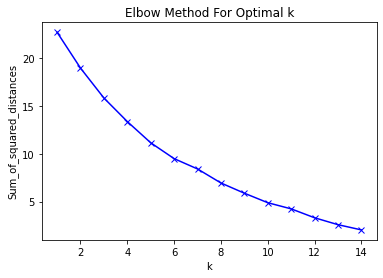

In [325]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
#read geojson file for choropleth map
neigh_paris = r'arrondissements.geojson'

In [26]:
#transform neighborhood numbers in strings in order to apply the choropleth map
merged['Neighborhood'] = merged['Neighborhood'].apply(lambda x : str(x))

In [27]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import json

with open('arrondissements.geojson') as json_file:
    data = json.load(json_file)
    
p = pd.DataFrame()

for i in merged.index :
    p.at[i, 'Latitude'] = data['features'][i]['properties']['geom_x_y'][0]
    p.at[i, 'Longitude'] = data['features'][i]['properties']['geom_x_y'][1]
    p.at[i, 'Neighborhood'] = data['features'][i]['properties']['l_ar']

p = p.sort_values(by = ['Neighborhood']).reset_index()

In [37]:
#print Paris map with clusters

paris_map = folium.Map(location=[48.869570, 2.324295], zoom_start=12, tiles='OpenStreetMap')

paris_map.choropleth(
    geo_data=neigh_paris, 
    data=merged,
    columns=['Neighborhood','Cluster Labels'],
    key_on='feature.properties.l_ar',
    fill_color = 'YlGnBu', 
    fill_opacity=0.65, 
    line_opacity=0.7,
    #legend_name="Clustering of Paris neighborhoods",
    bins = 6
)


from folium import IFrame

for x in range(20):
    folium.Marker(location=[p.at[x, 'Latitude'], p.at[x, 'Longitude']],
                  # Set icon to DivIcon to with conditional style formatting to reference the random temp value.
                  icon=folium.DivIcon(html=f"""<div style="font-weight: bold; font-size : 140%; font-family : verdana; color: {'A7F133'}">{"{:.0f}".format(x+1)}</div>""")
                 ).add_to(paris_map)


paris_map